<a href="https://colab.research.google.com/github/hmaldonado12/7506R-1C2024-GRUPO6/blob/main/Copia_de_7506R_TP1_GRUPO06_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Análisis Exploratorio y Preprocesamiento de Datos**
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

### **PREPRACION DE LOS DATOS**
Crear un nuevo dataset que contemplen los siguientes atributos :
- Tipos de vivienda : Casa, Ph Y Departamentos
- Moneda de transacción : Dolares (USD)
- Ubicacion : Capital Federal

##### **1.1 Mostrar informacion del dataset con los filtros requeridos del enunciado**

In [82]:
import pandas as pd
properties_argentina = pd.read_csv('../tp1/properati_argentina_2021.csv')

attributes_list = ["property_type", "operation", "property_currency", "place_l2"]
conditions_list = [["Casa", "PH","Departamento"],["Venta"],["USD"],["Capital Federal"]]

def get_dataframe_by(data, attributes: list, conditions: list):
    housing_type = data[attributes[0]].isin(conditions[0])
    is_operation_sale = data[attributes[1]].isin(conditions[1])
    is_property_currency_usd = data[attributes[2]].isin(conditions[2])
    is_place_l2_capital_federal = data[attributes[3]].isin(conditions[3])
    return data[housing_type & is_operation_sale & is_property_currency_usd & is_place_l2_capital_federal]

properties_argentina_filtered = get_dataframe_by(properties_argentina, attributes_list, conditions_list)
print("Dataframe antes de filtrar : ", properties_argentina.shape)
print("Datafrema filtrado: ", properties_argentina_filtered.shape)

Dataframe antes de filtrar :  (460154, 20)
Datafrema filtrado:  (94249, 20)


#### 1.2 Separar el conjunto de prueba y de entranamiento
- Entranamiento 80%
- Prueba 20 %

In [83]:
from sklearn.model_selection import train_test_split
properties_argentina_train_set, properties_argentina_test_set = train_test_split(properties_argentina_filtered, test_size=0.2, random_state=42)
print("Conjunto de Entranamiento: ", properties_argentina_train_set.shape)
print("Conjunto de Prueba: ", properties_argentina_test_set .shape)

Conjunto de Entranamiento:  (75399, 20)
Conjunto de Prueba:  (18850, 20)


## **ENTENDER EL PROBLEMA**
El objetivo del tp es poder entrenar un modelo que pueda predecir el valor de venta de un inmueble en cualquier barrio de capital federal.
En esta primera parte del es importante limpiar los datos y ademas entender como los datos pueden influir en la prediccion de nuestro modelo o rendimiento de nuestro modelo.

### COMPROBACIONES PLANTEADAS EN EL TP
Las comprobaciones nos daran un entendimiento mas profundo sobre los datos. Con lo conocimientos de los datos vamos a tener mas criterio para poder limpiar los mismo y poder entrenar el modelo.
#### a) Exploración Inicial : analizar cada variable, considerando los siguientes aspectos
#### a.1)Variables Cuantitativas: calcular medidas de resumen: media, mediana,moda,etc

In [84]:
properties_argentina_train_set.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,72420.000000,72420.000000,0.0,74555.000000,66597.000000,71509.000000,72708.000000,7.539900e+04
mean,-34.591358,-58.449737,NaN,2.825015,2.017208,111.841013,89.872806,2.260926e+05
std,0.188601,0.289167,NaN,1.433820,1.135236,1079.926643,1106.107524,3.183805e+05
min,-53.788624,-71.471192,NaN,1.000000,-1.000000,10.000000,1.000000,5.000000e+03
25%,-34.615996,-58.466550,NaN,2.000000,1.000000,45.000000,40.000000,9.500000e+04
50%,-34.595757,-58.439146,NaN,3.000000,2.000000,65.000000,58.000000,1.439000e+05
75%,-34.577367,-58.408917,NaN,4.000000,3.000000,105.000000,89.000000,2.380000e+05
max,-24.219827,-54.133330,NaN,40.000000,70.000000,137000.000000,217000.000000,2.140000e+07


#### a.2) Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [85]:
properties_argentina_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75399 entries, 285884 to 75496
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        75399 non-null  object 
 1   start_date                75399 non-null  object 
 2   end_date                  75399 non-null  object 
 3   created_on                75399 non-null  object 
 4   latitud                   72420 non-null  float64
 5   longitud                  72420 non-null  float64
 6   place_l2                  75399 non-null  object 
 7   place_l3                  75073 non-null  object 
 8   place_l4                  2870 non-null   object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 75399 non-null  object 
 12  property_type             75399 non-null  object 
 13  property_rooms            74555 non-null  float64
 14  proper

Con la informacion del recuadro anterior vamos a agrupar las varaiables cualitativas

In [86]:
attributes = ['place_l2', 'place_l3', 'place_l4', 'property_type', 'operation', 'property_currency', "property_title"]
properties_argentina_train_set[attributes].value_counts()

place_l2         place_l3  place_l4           property_type  operation  property_currency  property_title                                                              
Capital Federal  Palermo   Palermo Hollywood  Departamento   Venta      USD                Departamento - Palermo Hollywood                                                234
                           Palermo Chico      Departamento   Venta      USD                Departamento - Palermo Chico                                                    165
                           Palermo Soho       Departamento   Venta      USD                Departamento - Palermo Soho                                                     142
                           Palermo Hollywood  Departamento   Venta      USD                VENTA - Departamentos de 1, 2 y 3 amb  - Palermo Hollywood                       48
                           Palermo Viejo      Departamento   Venta      USD                Departamento - Palermo Viejo             

#### a.3) Determinar variables irrelevantes en el análisis
Con la informacion del punto anterior podemos determinar algunas variables que no son relevantes para nuestro modelo, es decir no nos van aportar informacion de calidad que sirva para el entranamiento del modelo.

##### **Analisis :**
c.1) Los atributos start_date, end_date y create_on  hacen referencia a las fechas en las cuales se crearon los datos, por lo tanto esto no es relevante para nuestro modelo de prediccion

c.2) Los atributos place_l3 y place_l4 son atributos relevantes ya que el barrio puede influir en el precion de un inmueble.

Loss atributos place_l2 , place_l5 y place_l6 los dejamos afurea del analisis. El atributo place_l2 lo utilizamos para filtrar la informacion por capital federal y los atributos place_l6,place_5 directamente no tiene datos.


Los atributos irrelevantes para nuestro analisis son :
- start_date
- end_date
- create_on
- place_l5
- place_l6

Por lo tanto estas variables se pueden eliminar del data frame

In [87]:
properties_argentina_train_set.drop(columns=["start_date", "end_date", "created_on", "place_l5", "place_l6"]).head()

,id,latitud,longitud,place_l2,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
285884,sH/yN2YdtUSSJepTsIXyjQ==,-34.621390,-58.506366,Capital Federal,Monte Castro,NaN,Venta,Departamento,3.0,2.0,51.0,44.0,112000.0,USD,Venta tres ambientes chico cochera y amplio ba...
120762,8vhkDo5KTd+Wwz3QYRR7wg==,-34.563005,-58.453674,Capital Federal,Belgrano,NaN,Venta,Departamento,3.0,2.0,79.0,66.0,299900.0,USD,VENTA DEPARTAMENTO 3 AMB COCHERA BELGRANO
419659,hnDEA6QbHN6K/57Hkhlrhg==,-34.612349,-58.491906,Capital Federal,Villa del Parque,NaN,Venta,Departamento,3.0,2.0,110.0,80.0,249000.0,USD,VENTA | DEPARTAMENTO |3 AMBIENTES | V. DEL PARQUE
21443,FMJCKPGRvEjbz0NBCaZ3Gw==,-34.620806,-58.397336,Capital Federal,Boedo,NaN,Venta,PH,3.0,2.0,97.0,67.0,135000.0,USD,Casa - Boedo
103677,GgQjrtJSz1N4jQ8aSuNudA==,-34.558229,-58.446708,Capital Federal,Belgrano,NaN,Venta,Departamento,3.0,2.0,89.0,89.0,300000.0,USD,Departamento - Belgrano


#### a.4)  Realizar un análisis gráfico de las distribuciones de las variables más relevantes

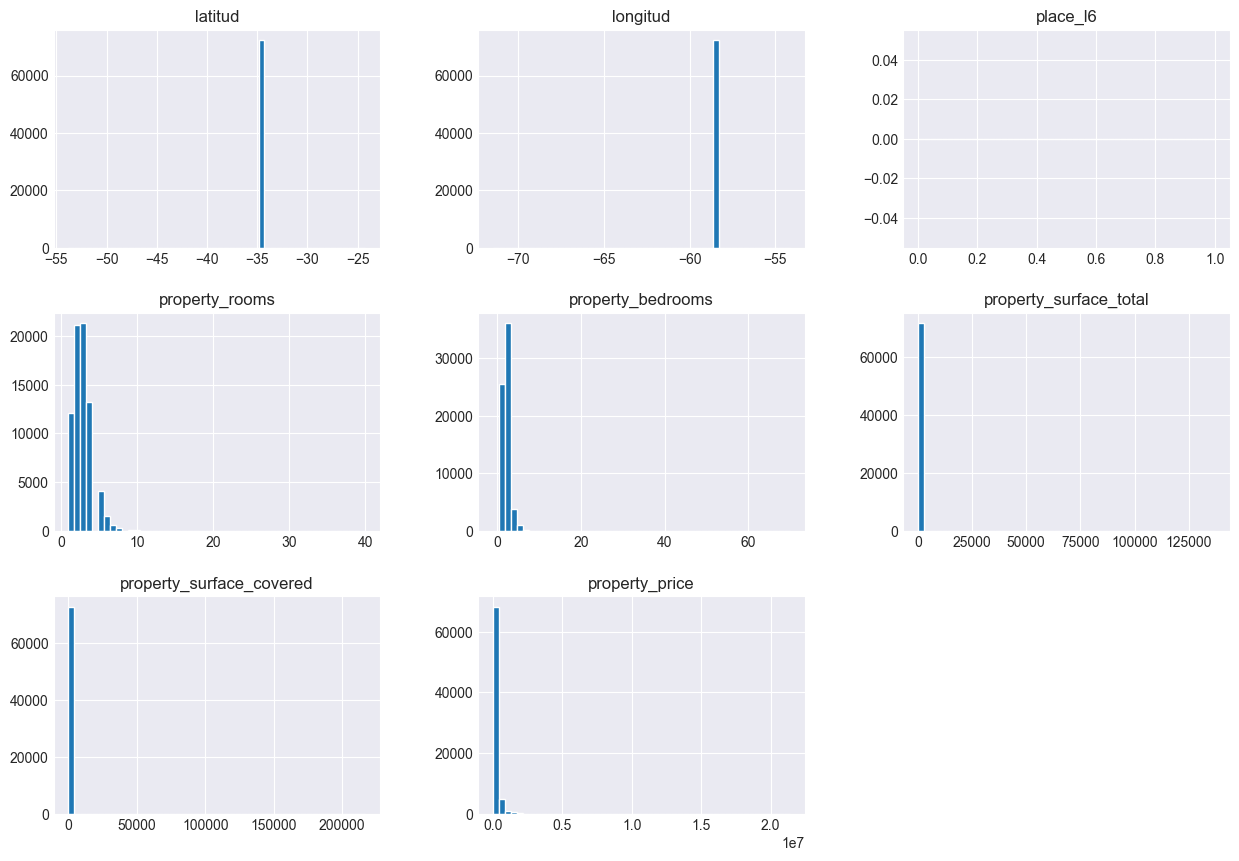

In [88]:
import matplotlib.pyplot as plt
properties_argentina_train_set.hist(figsize=(12, 8), bins=50)
plt.show()

#### a.5) Analizar las correlaciones existentes entre las variables.
Para analizar la correlacion entre las variables, hay que seleccionar aquellas variables del tipo float64

<Axes: >

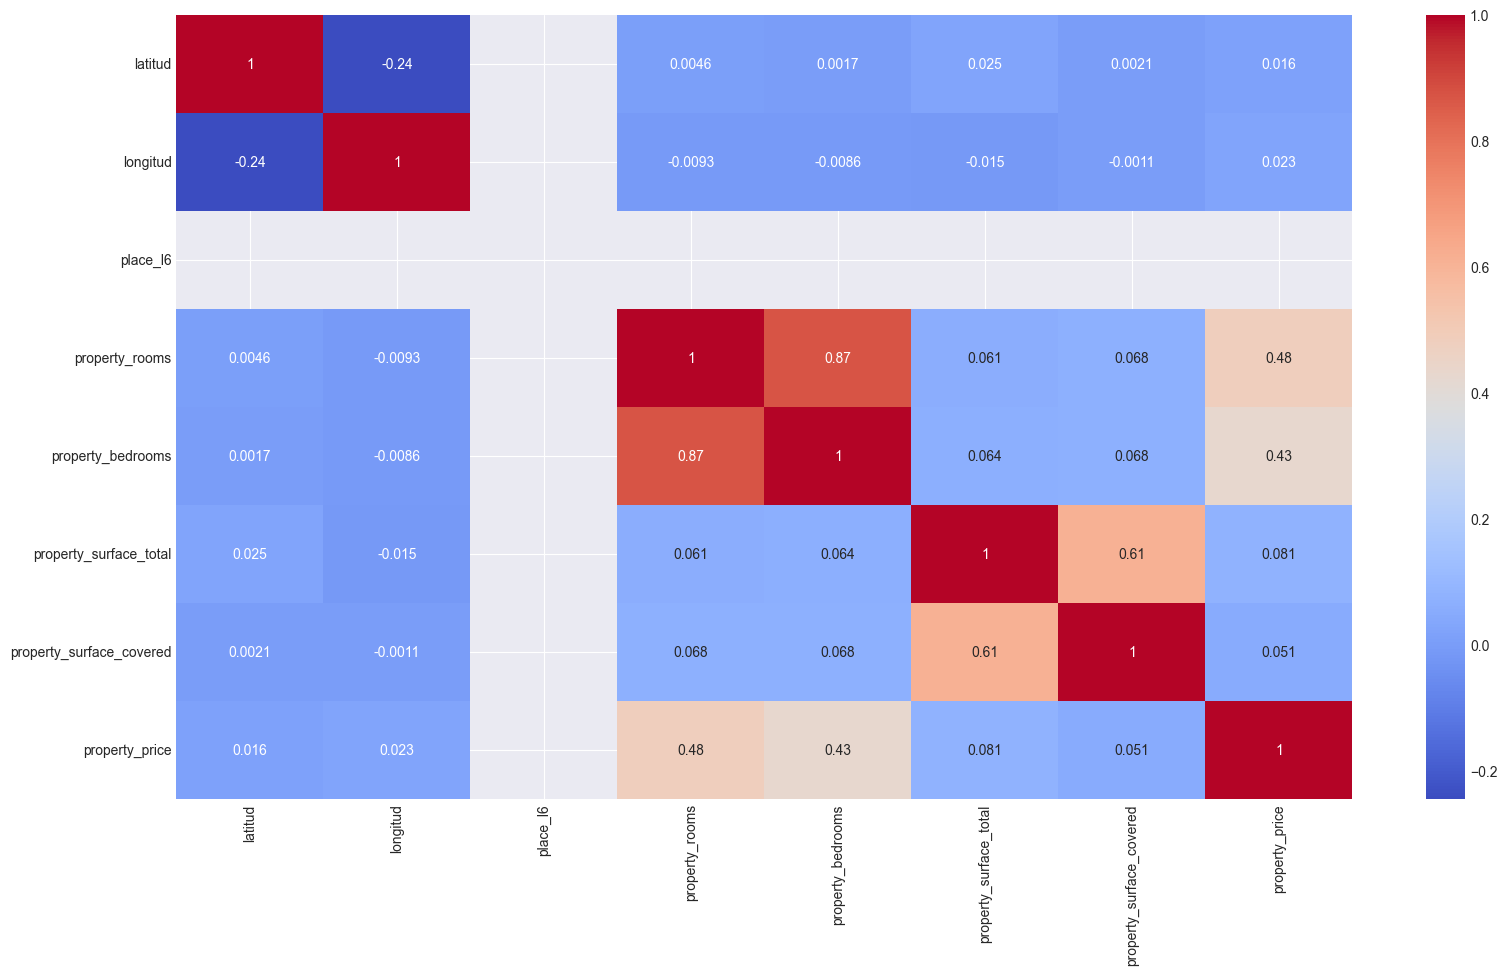

In [89]:
import seaborn as sns
properties_argentina_numeric = properties_argentina_train_set.select_dtypes(include=['float64', 'int64'])
corr_matrix = properties_argentina_numeric.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

Se analiza la correlacion de todos los atributos respecto al precio de la propiedad,podemos observar que los  atributo rooms y bedrooms tiene correlaciones positivas, esto quiere decir que el precio de una vivienda puede aumentar si estos dos atributos aumentan.
Con esta informacion tambien nos podemos preguntar lo siguiente : ¿ La proporcion de habitaciones/ambientes por casa puede influir el en precio de una propiedad ?, para contestar esta pregunta, se puede crear una nueva variable que represente el nuevo atributo


In [90]:
properties_argentina_filtered_copy = properties_argentina_train_set.copy()
properties_argentina_filtered_copy["property_bedrooms_ratio"] = properties_argentina_filtered_copy["property_bedrooms"] / properties_argentina_filtered_copy["property_rooms"]

properties_argentina_numeric = properties_argentina_filtered_copy.select_dtypes(include=['float64', 'int64'])
corr_matrix = properties_argentina_numeric.corr()
corr_property_price = corr_matrix["property_price"].sort_values(ascending=False)
print(corr_property_price)


property_price              1.000000
property_rooms              0.484365
property_bedrooms           0.426593
property_surface_total      0.080665
property_bedrooms_ratio     0.062126
property_surface_covered    0.050979
longitud                    0.022694
latitud                     0.016128
place_l6                         NaN
Name: property_price, dtype: float64


Si observamos el valor obtenido no tiene mucha influencia en sobre el valor de un propiedad.
Tambien se puede hacer el mismo analisis con la proporcion de la property_surface_covered/property_surface_total

In [91]:
properties_argentina_filtered_copy = properties_argentina_train_set.copy()
properties_argentina_filtered_copy["property_surface_ratio"] = properties_argentina_filtered_copy["property_surface_covered"] / properties_argentina_filtered_copy["property_surface_total"]

properties_argentina_numeric = properties_argentina_filtered_copy.select_dtypes(include=['float64', 'int64'])
corr_matrix = properties_argentina_numeric.corr()
corr_property_price = corr_matrix["property_price"].sort_values(ascending=False)
print(corr_property_price)

property_price              1.000000
property_rooms              0.484365
property_bedrooms           0.426593
property_surface_total      0.080665
property_surface_covered    0.050979
longitud                    0.022694
latitud                     0.016128
property_surface_ratio     -0.001285
place_l6                         NaN
Name: property_price, dtype: float64


Si bien es una correlacion negativa, el valor no es muy representativo, por lo tanto podemos concluir que no influye en la determinacion del precio de una propiedad.
Concluimos que las dos atributos que pueden influir en el precio de una propiedad son : property_bedrooms y property_rooms.

### b) Visualización de los datos: en esta sección se espera que puedan realizar una primera
aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de dispersión
entre variables, histogramas, heatmaps, exploración de las columnas y cualquier otro gráfico
adicional que se considere útil justificando su utilización.
Para visualizar los datos, vamos a utilizar un grafico del tipo geografico. Est nos ayudara a entender en que zonas de capital los precios de las propiedades pueden ser mas caras o mas baratas.

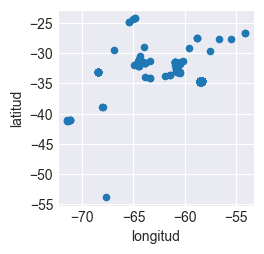

In [92]:
properties_argentina_train_set.plot(kind="scatter", x="longitud", y="latitud", grid=True)
plt.show()

Otra cosa que podemos hacer es ver la densidad de puntos en el mapa

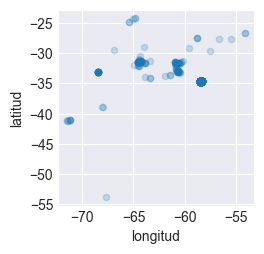

In [93]:
properties_argentina_train_set.plot(kind="scatter", x="longitud", y="latitud", grid=True, alpha=0.2)
plt.show()

Ahora vamos a observar con un mapa de calor las propiedades mas caras y en que parte se concentran las que tiene mas metros cuadrados(totales)

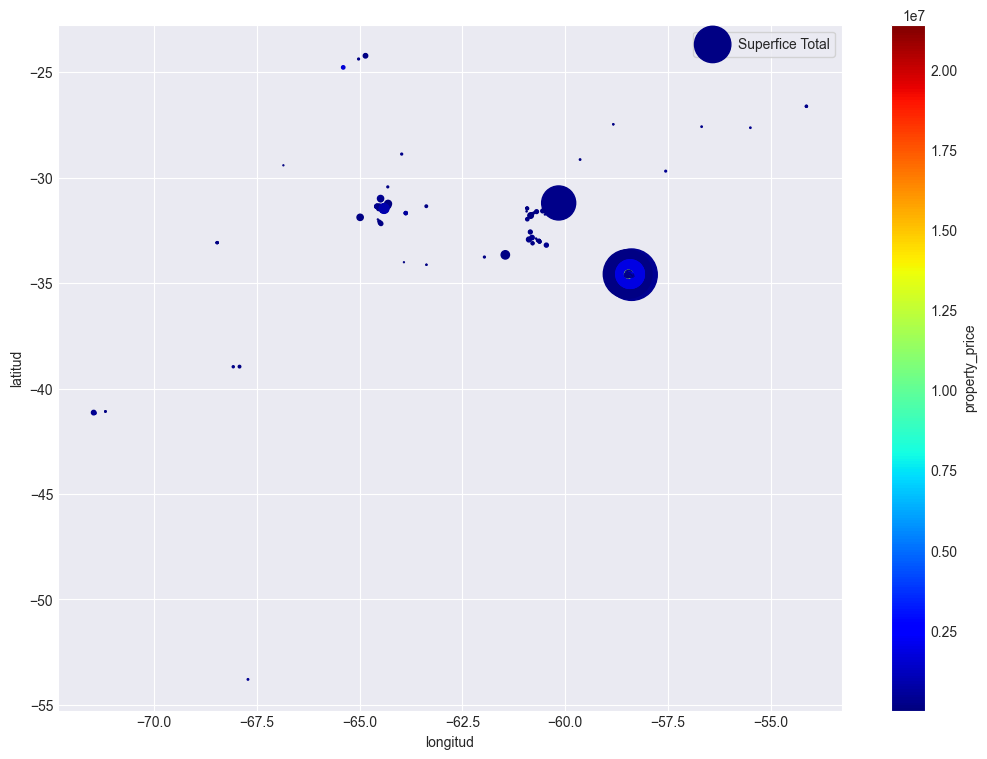

In [99]:
properties_argentina_train_set.plot(kind="scatter", x="longitud", y="latitud", grid=True,
s=properties_argentina_train_set["property_surface_total"] / 100 , label="Superfice Total",
c="property_price", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()